# Black Friday Sales EDA

## About Dataset
### Dataset History
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.

The data set also contains customer demographics (age, gender, marital status, citytype, stayincurrentcity), product details (productid and product category) and Total purchaseamount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

### DATA PREPROCESSING

* Check basic statistics of dataset
* Check for missing values in the data
* check for unique values in data
* Perform EDA
* Purchase Distribution
* check for outliers
* Analysis by Gender, Marital Status, occupation, occupation vs purchase , purchase by city, purchase by age group, etc
* Drop unnecessary fields
* Convert categorical data into integer using map function (e.g 'Gender' column)
* missing value treatment
* Rename columns
* fill nan values
* map range variables into integers (e.g 'Age' column)

### Data Visualisation

* visualize individul column
* Age vs Purchased
* Occupation vs Purchased
* Product_category_1 vs Purchased
* Product_category_2 vs Purchased
* Product_category_3 vs Purchased
* City category pie chart
* check for more possible plots

https://www.kaggle.com/datasets/pranavuikey/black-friday-sales-eda

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import datetime as dt
from math import sqrt, pow
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype

# warnings
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)

In [2]:
df = pd.read_csv("data/black-friday-sales-eda.csv",
                low_memory=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [3]:
df.shape

(550068, 12)

In [4]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [5]:
df.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

## Data Cleaning

* Product_Category_2: Replace NAN value with most occurred category in the actual column.
* Product_Category_3: Replace NAN value with most occurred category in the actual column.

In [6]:
mode_product_cat2 = df['Product_Category_2'].mode()[0]
mode_product_cat3 = df['Product_Category_3'].mode()[0]

In [7]:
df['Product_Category_2'].fillna(mode_product_cat2, inplace=True)
df['Product_Category_3'].fillna(mode_product_cat3, inplace=True)

## Format Data

* Gender: F-Female, M-Male
* Marital_Status: 0: Single, 1: Married
* Combine 2 columns: Gender and Marital_Status

In [8]:
df['Gender'] = df['Gender'].replace(['F', 'M'], 
                                    ['Female', 'Male'])

In [9]:
df['Marital_Status'] = df['Marital_Status'].replace([0,1], 
                                                    ['Single', 'Married'])

In [10]:
df['G_MS'] = df["Gender"].str.cat(df["Marital_Status"], sep = ", ")

## 📊 Data Visualizations 🖼

* visualize individul column
* Age vs Purchased
* Occupation vs Purchased
* Productcategory1 vs Purchased
* Productcategory2 vs Purchased
* Productcategory3 vs Purchased
* City category pie chart
* check for more possible plots

In [11]:
df.nunique().to_frame(name='Count of unique values')

,Count of unique values
User_ID,5891
Product_ID,3631
Gender,2
Age,7
Occupation,21
City_Category,3
Stay_In_Current_City_Years,5
Marital_Status,2
Product_Category_1,20
Product_Category_2,17


### Column Product_ID

In [12]:
product_col = df['Product_ID'].value_counts().head(10)
product_col

P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
P00184942    1440
P00046742    1438
P00058042    1422
P00059442    1406
P00145042    1406
Name: Product_ID, dtype: int64

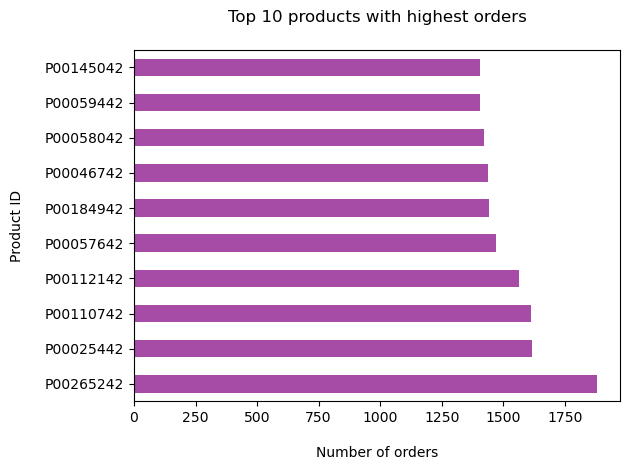

In [13]:
ax = product_col.plot(kind='barh', 
                      stacked=False,
                      color='purple',
                      alpha=0.7)
plt.xlabel('Number of orders', labelpad=15)
plt.ylabel('Product ID', labelpad=15)
plt.title('Top 10 products with highest orders', pad=20)
plt.tight_layout()
plt.show;

### Column Gender

In [14]:
gender_col = df['Gender'].value_counts()
gender_col

Male      414259
Female    135809
Name: Gender, dtype: int64

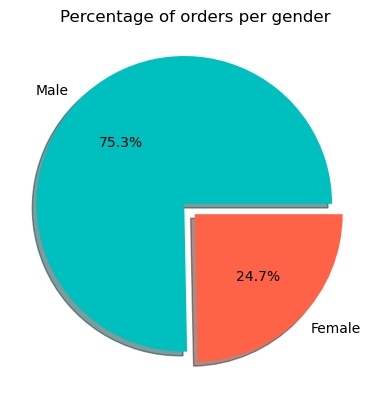

In [15]:
plt.pie(df['Gender'].value_counts(),
       labels = df['Gender'].value_counts().index,
       autopct = '%1.1f%%',
       colors = ['c', 'tomato'],
       explode = (0.1, 0), shadow = True)

plt.title('Percentage of orders per gender')
plt.show()

### Column Age

In [16]:
age_type = CategoricalDtype(categories=["0-17", "18-25", "26-35", "36-45", "46-50", "51-55","55+"], 
                            ordered=True)
age_col = df['Age'].astype(age_type).value_counts(sort=False)
age_col

0-17      15102
18-25     99660
26-35    219587
36-45    110013
46-50     45701
51-55     38501
55+       21504
Name: Age, dtype: int64

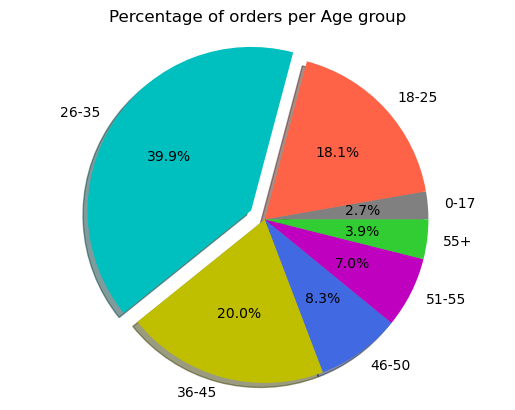

In [17]:
plt.pie(age_col,
       labels = age_col.index,
       autopct = '%1.1f%%',
       colors = ['gray','tomato','c','y','royalblue','m','limegreen'],
       explode = (0, 0, 0.1, 0, 0, 0, 0), 
       shadow = True)
plt.axis('equal')
plt.title('Percentage of orders per Age group')
plt.show()

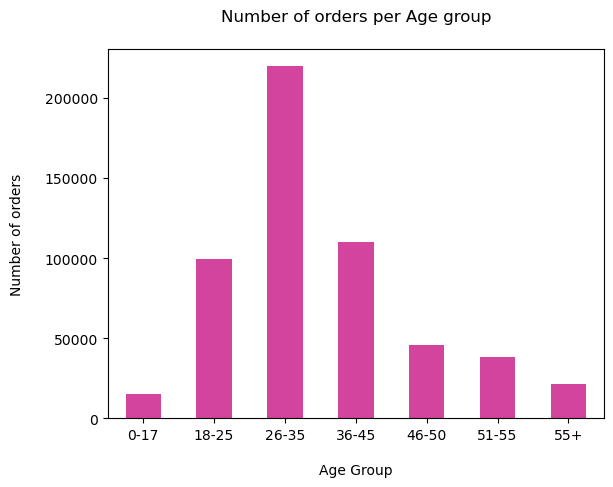

In [18]:
ax = age_col.plot(kind='bar', 
                  stacked=False, rot=0,
                  color='mediumvioletred',
                  alpha=0.8)
plt.xlabel('Age Group', labelpad=15)
plt.ylabel('Number of orders', labelpad=15)
plt.title('Number of orders per Age group', pad=20)
plt.show;

### Column Occupation

In [19]:
occ_type = CategoricalDtype(categories=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], 
                            ordered=True)
occ_col = df['Occupation'].astype(occ_type).value_counts(sort=False)
occ_col

0     69638
1     47426
2     26588
3     17650
4     72308
5     12177
6     20355
7     59133
8      1546
9      6291
10    12930
11    11586
12    31179
13     7728
14    27309
15    12165
16    25371
17    40043
18     6622
19     8461
20    33562
Name: Occupation, dtype: int64

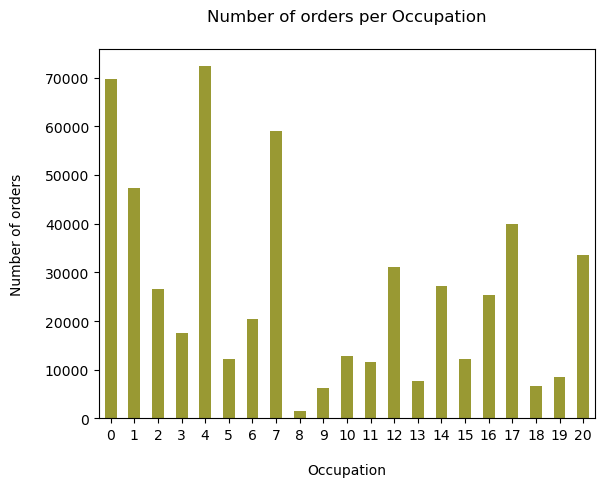

In [20]:
ax = occ_col.plot(kind='bar', 
                  stacked=False, rot=0,
                  color='olive',
                  alpha=0.8)
plt.xlabel('Occupation', labelpad=15)
plt.ylabel('Number of orders', labelpad=15)
plt.title('Number of orders per Occupation', pad=20)
plt.show;

### Column City_Category

In [21]:
city_type = CategoricalDtype(categories=["A", "B", "C"], 
                            ordered=True)
city_cat_col = df['City_Category'].astype(city_type).value_counts(sort=False)
city_cat_col

A    147720
B    231173
C    171175
Name: City_Category, dtype: int64

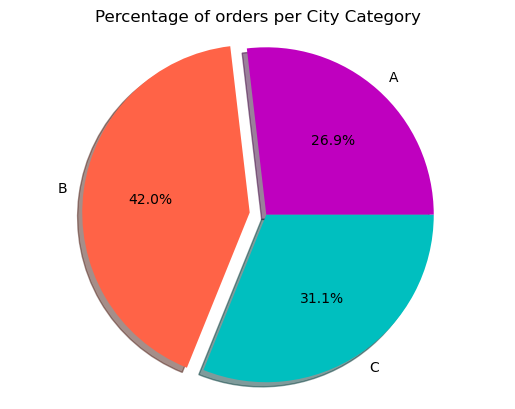

In [22]:
plt.pie(city_cat_col,
       labels = city_cat_col.index,
       autopct = '%1.1f%%',
       colors = ['m','tomato','c'],
       explode = (0, 0.1, 0), 
       shadow = True)
plt.axis('equal')
plt.title('Percentage of orders per City Category')
plt.show()

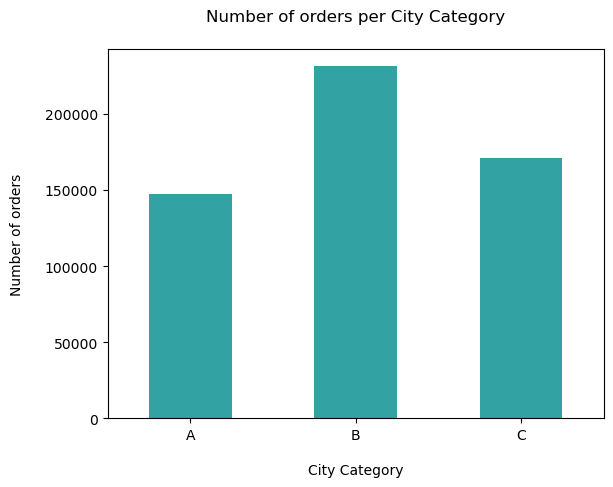

In [23]:
ax = city_cat_col.plot(kind='bar', 
                  stacked=False, rot=0,
                  color='darkcyan',
                  alpha=0.8)
plt.xlabel('City Category', labelpad=15)
plt.ylabel('Number of orders', labelpad=15)
plt.title('Number of orders per City Category', pad=20)
plt.show;

### Column Stay_In_Current_City_Years

In [24]:
df['Stay_In_Current_City_Years'].value_counts()
city_years_type = CategoricalDtype(categories=["0", "1", "2","3","4+"], 
                                    ordered=True)
city_years_col = df['Stay_In_Current_City_Years'].astype(city_years_type).value_counts(sort=False)
city_years_col

0      74398
1     193821
2     101838
3      95285
4+     84726
Name: Stay_In_Current_City_Years, dtype: int64

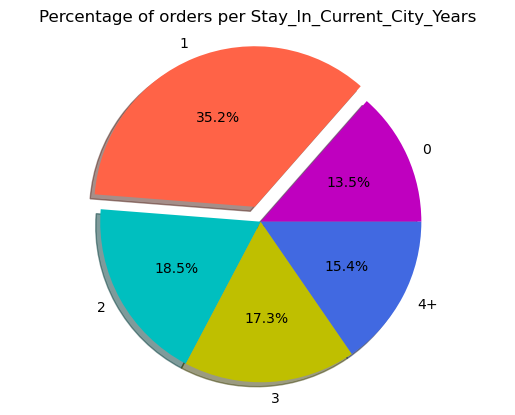

In [25]:
plt.pie(city_years_col,
       labels = city_years_col.index,
       autopct = '%1.1f%%',
       colors = ['m','tomato','c','y','royalblue'],
       explode = (0, 0.1, 0, 0, 0), 
       shadow = True)
plt.axis('equal')
plt.title('Percentage of orders per Stay_In_Current_City_Years')
plt.show()

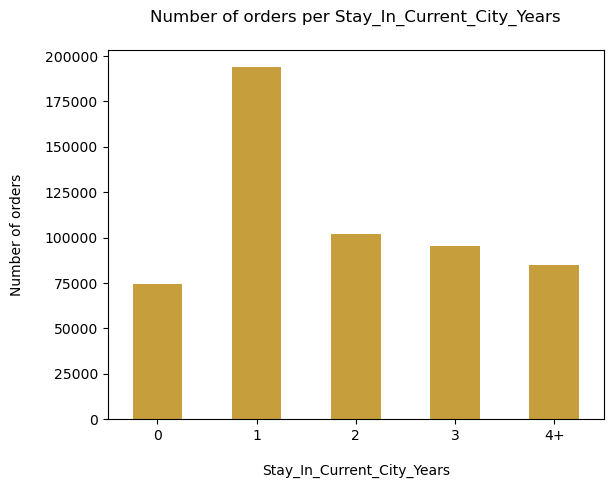

In [26]:
ax = city_years_col.plot(kind='bar', 
                    stacked=False, rot=0,
                    color='darkgoldenrod',
                    alpha=0.8)
plt.xlabel('Stay_In_Current_City_Years', labelpad=15)
plt.ylabel('Number of orders', labelpad=15)
plt.title('Number of orders per Stay_In_Current_City_Years', pad=20)
plt.show;

### Column Marital_Status

In [27]:
marital_stt_col = df['Marital_Status'].value_counts()
marital_stt_col

Single     324731
Married    225337
Name: Marital_Status, dtype: int64

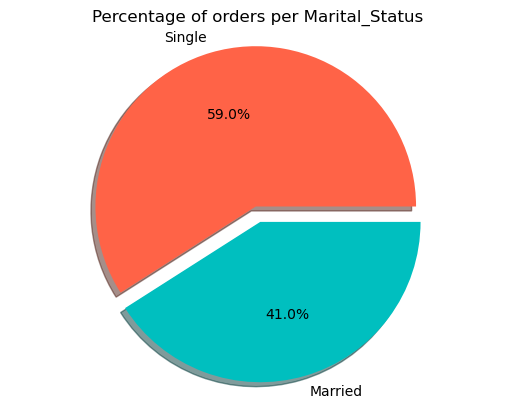

In [28]:
plt.pie(marital_stt_col,
       labels = marital_stt_col.index,
       autopct = '%1.1f%%',
       colors = ['tomato','c'],
       explode = (0.1, 0), 
       shadow = True)
plt.axis('equal')
plt.title('Percentage of orders per Marital_Status')
plt.show()

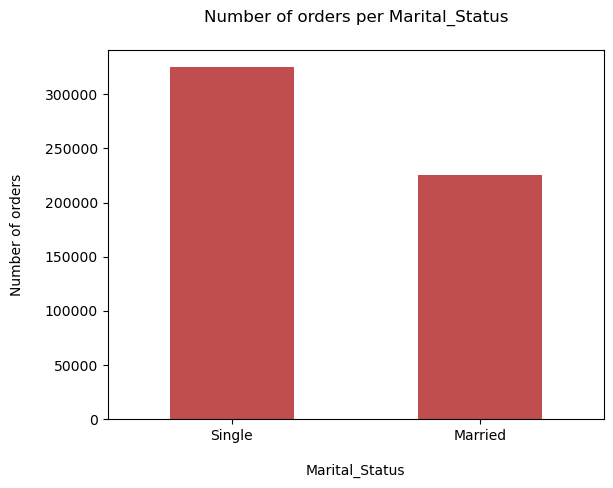

In [29]:
ax = marital_stt_col.plot(kind='bar', 
                         stacked=False, rot=0,
                         color='firebrick',
                         alpha=0.8)
plt.xlabel('Marital_Status', labelpad=15)
plt.ylabel('Number of orders', labelpad=15)
plt.title('Number of orders per Marital_Status', pad=20)
plt.show;

### Column Product_Category_1

In [30]:
product_cat1_type = CategoricalDtype(categories=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], 
                                    ordered=True)
product_cat1_col = df['Product_Category_1'].astype(product_cat1_type).value_counts(sort=False)
product_cat1_col

1     140378
2      23864
3      20213
4      11753
5     150933
6      20466
7       3721
8     113925
9        410
10      5125
11     24287
12      3947
13      5549
14      1523
15      6290
16      9828
17       578
18      3125
19      1603
20      2550
Name: Product_Category_1, dtype: int64

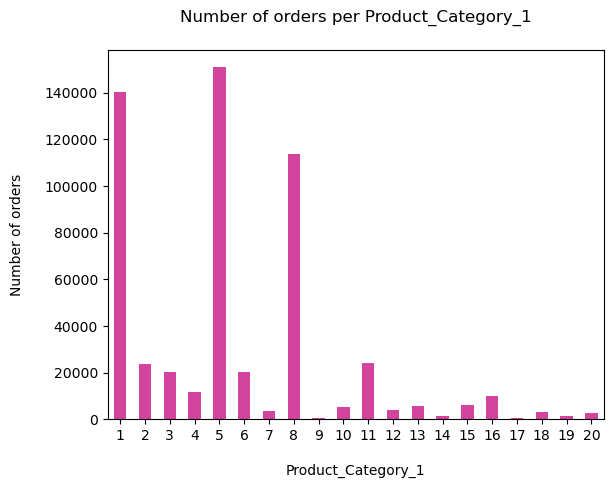

In [31]:
ax = product_cat1_col.plot(kind='bar', 
                          stacked=False, rot=0,
                          color='mediumvioletred',
                          alpha=0.8)
plt.xlabel('Product_Category_1', labelpad=15)
plt.ylabel('Number of orders', labelpad=15)
plt.title('Number of orders per Product_Category_1', pad=20)
plt.show;

### Column Product_Category_2

In [32]:
product_cat2_type = CategoricalDtype(categories=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17], 
                                    ordered=True)
product_cat2_col = df['Product_Category_2'].astype(product_cat2_type).value_counts(sort=False)
product_cat2_col

2      49217
3       2884
4      25677
5      26235
6      16466
7        626
8     237726
9       5693
10      3043
11     14134
12      5528
13     10531
14     55108
15     37855
16     43255
17     13320
Name: Product_Category_2, dtype: int64

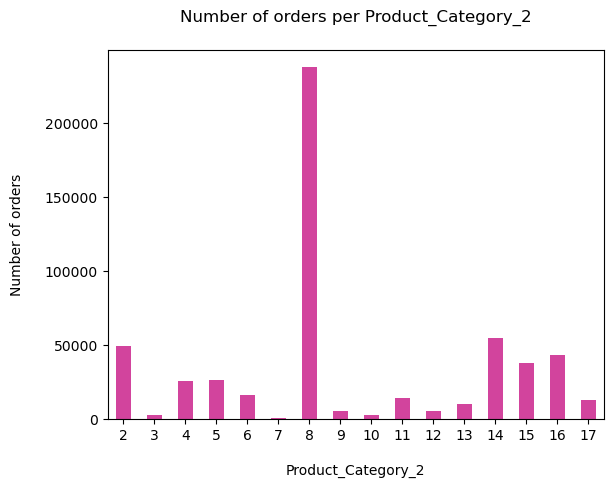

In [33]:
ax = product_cat2_col.plot(kind='bar', 
                          stacked=False, rot=0,
                          color='mediumvioletred',
                          alpha=0.8)
plt.xlabel('Product_Category_2', labelpad=15)
plt.ylabel('Number of orders', labelpad=15)
plt.title('Number of orders per Product_Category_2', pad=20)
plt.show;

### Column Product_Category_3

In [34]:
product_cat3_type = CategoricalDtype(categories=[3,4,5,6,8,9,10,11,12,13,14,15,16,17], 
                                     ordered=True)
product_cat3_col = df['Product_Category_3'].astype(product_cat3_type).value_counts(sort=False)
product_cat3_col

3        613
4       1875
5      16658
6       4890
8      12562
9      11579
10      1726
11      1805
12      9246
13      5459
14     18428
15     28013
16    415883
17     16702
Name: Product_Category_3, dtype: int64

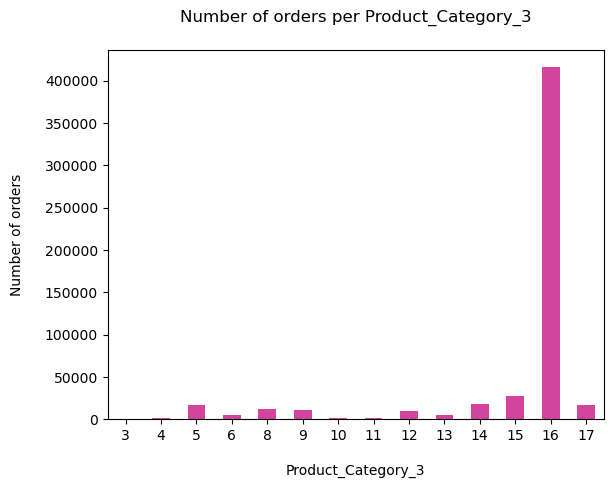

In [35]:
ax = product_cat3_col.plot(kind='bar', 
                          stacked=False, rot=0,
                          color='mediumvioletred',
                          alpha=0.8)
plt.xlabel('Product_Category_3', labelpad=15)
plt.ylabel('Number of orders', labelpad=15)
plt.title('Number of orders per Product_Category_3', pad=20)
plt.show;

### Column Purchase

In [36]:
mean_purchase = df['Purchase'].mean()
median_purchase = df['Purchase'].median()
mode_purchase = df['Purchase'].mode()[0]

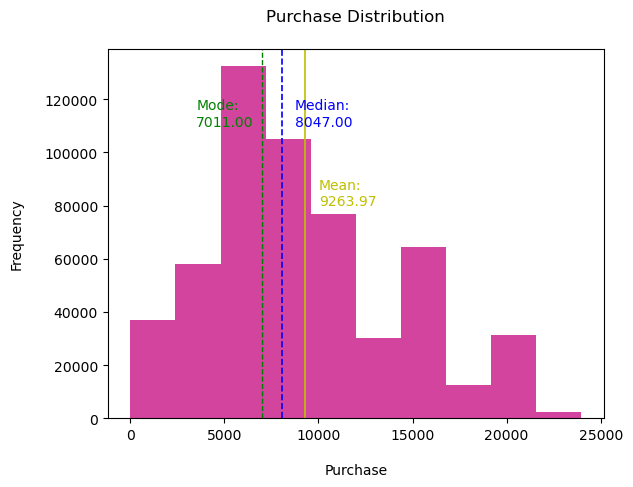

In [37]:
ax = df['Purchase'].plot(kind='hist', 
                          stacked=False, rot=0,
                          color='mediumvioletred',
                          alpha=0.8)

ax.axvline(mean_purchase, color='y', linestyle='-', linewidth=1.2)
ax.text(mean_purchase+750, 80000, f"Mean:\n{mean_purchase:.2f}", color="y")

ax.axvline(median_purchase, color='b', linestyle='dashed', linewidth=1.2)
ax.text(median_purchase+700, 110000, f"Median:\n{median_purchase:.2f}", color="b")

ax.axvline(mode_purchase, color='g', linestyle='--', linewidth=1)
ax.text(mode_purchase-3500, 110000, f"Mode:\n{mode_purchase:.2f}", color="g")

plt.xlabel('Purchase', labelpad=15)
plt.ylabel('Frequency', labelpad=15)
plt.title('Purchase Distribution', pad=20)
plt.show;

### Column G_MS (Gender & Marital Status)

In [38]:
g_ms_col = df['G_MS'].value_counts()
g_ms_col

Male, Single       245910
Male, Married      168349
Female, Single      78821
Female, Married     56988
Name: G_MS, dtype: int64

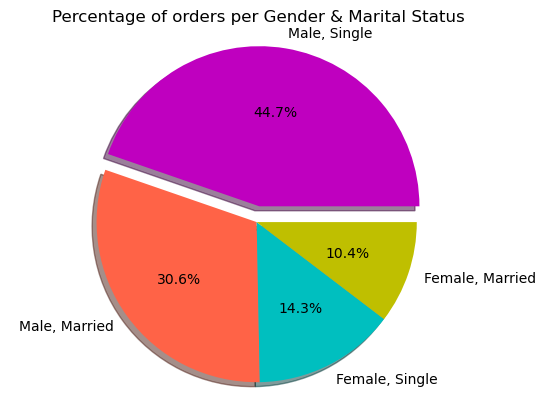

In [39]:
plt.pie(g_ms_col,
       labels = g_ms_col.index,
       autopct = '%1.1f%%',
       colors = ['m','tomato','c','y'],
       explode = (0.1, 0, 0, 0), 
       shadow = True)
plt.axis('equal')
plt.title('Percentage of orders per Gender & Marital Status')
plt.show()

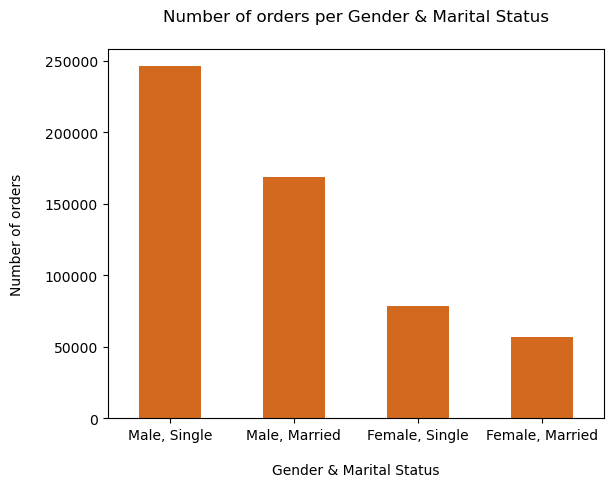

In [40]:
ax = g_ms_col.plot(kind='bar', 
                   stacked=False, rot=0,
                   color='chocolate')
plt.xlabel('Gender & Marital Status', labelpad=15)
plt.ylabel('Number of orders', labelpad=15)
plt.title('Number of orders per Gender & Marital Status', pad=20)
plt.show;

### Column 'G_MS' (Gender & Marital Stt) vs 'Age'

In [41]:
g_ms_type = CategoricalDtype(categories=["Female, Single","Male, Single", 
                                         "Female, Married", "Male, Married"], 
                             ordered=True)

In [42]:
df_gms_age = df['G_MS'].astype(g_ms_type).groupby(df['Age']).value_counts(sort=False).unstack()
df_gms_age

G_MS,"Female, Single","Male, Single","Female, Married","Male, Married"
Age,,,,
0-17,5083,10019,0,0
18-25,18357,60187,6271,14845
26-35,30078,103218,20674,65617
36-45,16649,49728,10521,33115
46-50,3166,9524,10033,22978
51-55,3580,7259,6314,21348
55+,1908,5975,3175,10446


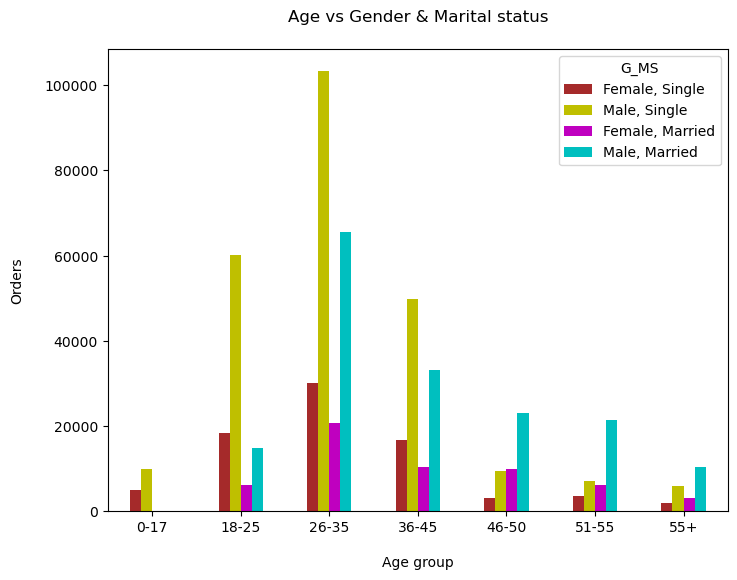

In [43]:
ax = df_gms_age.plot(kind='bar', 
                    stacked=False,
                    color=['brown', 'y', 'm','c'], rot=0,
                    figsize=(8,6))
plt.xlabel('Age group', labelpad=15)
plt.ylabel('Orders', labelpad=15)
plt.title('Age vs Gender & Marital status', pad=20)
plt.show;

In [44]:
df_age_gms = df['Age'].astype(age_type).groupby(df['G_MS'].astype(g_ms_type)).value_counts(sort=False).unstack()
df_age_gms

Age,0-17,18-25,26-35,36-45,46-50,51-55,55+
G_MS,,,,,,,
"Female, Single",5083,18357,30078,16649,3166,3580,1908
"Male, Single",10019,60187,103218,49728,9524,7259,5975
"Female, Married",0,6271,20674,10521,10033,6314,3175
"Male, Married",0,14845,65617,33115,22978,21348,10446


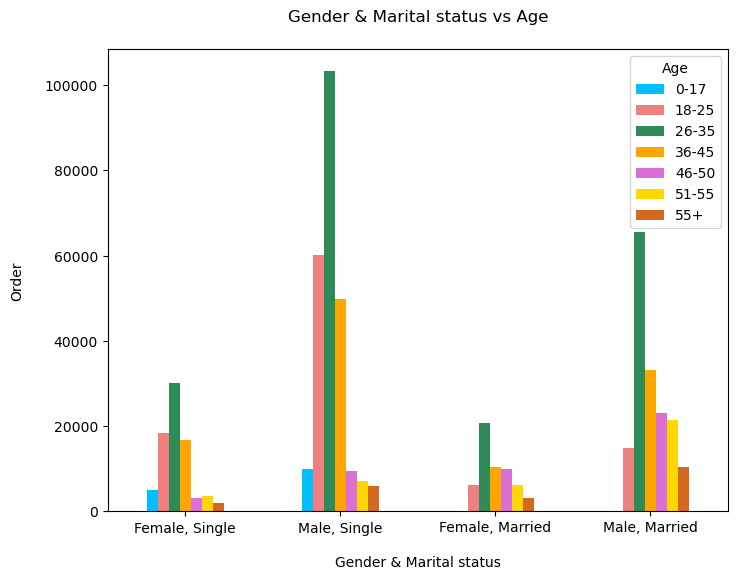

In [45]:
ax = df_age_gms.plot(kind='bar', 
                    stacked=False,
                    color=['deepskyblue', 'lightcoral', 'seagreen','orange',
                           'orchid','gold','chocolate'], 
                    rot=0,
                    figsize=(8,6))
plt.xlabel('Gender & Marital status', labelpad=15)
plt.ylabel('Order', labelpad=15)
plt.title('Gender & Marital status vs Age', pad=20)
plt.show;

### Column G_MS vs Occupation

In [46]:
df_occ_gms = df['G_MS'].astype(g_ms_type).groupby(df['Occupation'].astype(occ_type)).value_counts(sort=False).unstack()
df_occ_gms

G_MS,"Female, Single","Male, Single","Female, Married","Male, Married"
Occupation,,,,
0,10360,30129,7752,21397
1,9848,14876,8136,14566
2,4664,9642,3965,8317
3,4670,5694,3249,4037
4,14173,38603,3663,15869
5,1502,6106,718,3851
6,4362,6828,3798,5367
7,5403,28000,4625,21105
8,361,330,0,855


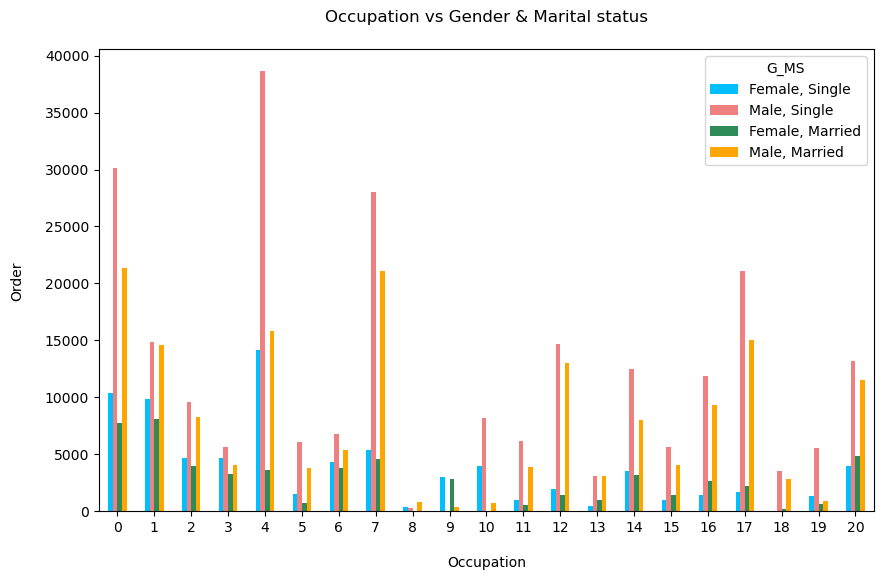

In [47]:
ax = df_occ_gms.plot(kind='bar', 
                    stacked=False,
                    color=['deepskyblue', 'lightcoral', 'seagreen','orange',
                           'orchid','gold','chocolate'], 
                    rot=0,
                    figsize=(10,6))
plt.xlabel('Occupation', labelpad=15)
plt.ylabel('Order', labelpad=15)
plt.title('Occupation vs Gender & Marital status', pad=20)
plt.show;

### Column G_MS vs City_Category

In [48]:
df_citycat_gms = df['G_MS'].astype(g_ms_type).groupby(df['City_Category'].astype(city_type)).value_counts(sort=False).unstack()
df_citycat_gms

G_MS,"Female, Single","Male, Single","Female, Married","Male, Married"
City_Category,,,,
A,21827,69346,13877,42670
B,34527,102194,23269,71183
C,22467,74370,19842,54496


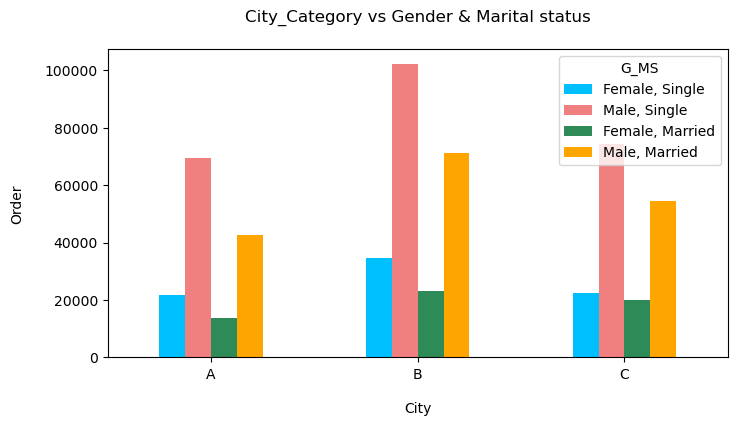

In [49]:
ax = df_citycat_gms.plot(kind='bar', 
                        stacked=False,
                        color=['deepskyblue', 'lightcoral', 'seagreen','orange',
                               'orchid','gold','chocolate'], 
                        rot=0,
                        figsize=(8,4))
plt.xlabel('City', labelpad=15)
plt.ylabel('Order', labelpad=15)
plt.title('City_Category vs Gender & Marital status', pad=20)
plt.show;

### Column Stay_In_Current_City_Years vs G_MS

In [50]:
df_city_years_gms = df['G_MS'].astype(g_ms_type).groupby(df['Stay_In_Current_City_Years'].astype(city_years_type)).value_counts(sort=False).unstack()
df_city_years_gms

G_MS,"Female, Single","Male, Single","Female, Married","Male, Married"
Stay_In_Current_City_Years,,,,
0,9190,35718,7873,21617
1,29218,81478,22080,61045
2,14571,46229,9761,31277
3,14182,43465,10338,27300
4+,11660,39020,6936,27110


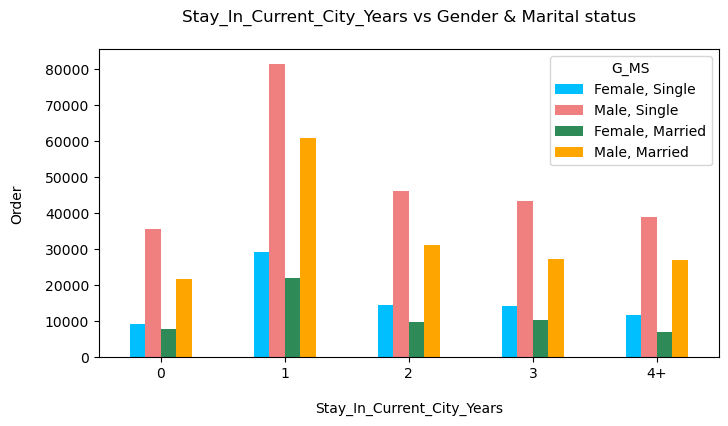

In [51]:
ax = df_city_years_gms.plot(kind='bar', 
                            stacked=False,
                            color=['deepskyblue', 'lightcoral', 'seagreen','orange',
                                   'orchid','gold','chocolate'], 
                            rot=0,
                            figsize=(8,4))
plt.xlabel('Stay_In_Current_City_Years', labelpad=15)
plt.ylabel('Order', labelpad=15)
plt.title('Stay_In_Current_City_Years vs Gender & Marital status', pad=20)
plt.show;

### Column Product_Category_1 vs G_MS

In [52]:
df_product_cat1_gms = df['G_MS'].astype(g_ms_type).groupby(df['Product_Category_1'].astype(product_cat1_type)).value_counts(sort=False).unstack()
df_product_cat1_gms

G_MS,"Female, Single","Male, Single","Female, Married","Male, Married"
Product_Category_1,,,,
1,14606,69769,10225,45778
2,3412,10726,2246,7480
3,3641,8718,2365,5489
4,2294,4883,1345,3231
5,24289,65367,17672,43605
6,2624,9515,1935,6392
7,472,1568,471,1210
8,19070,46341,14488,34026
9,43,204,27,136


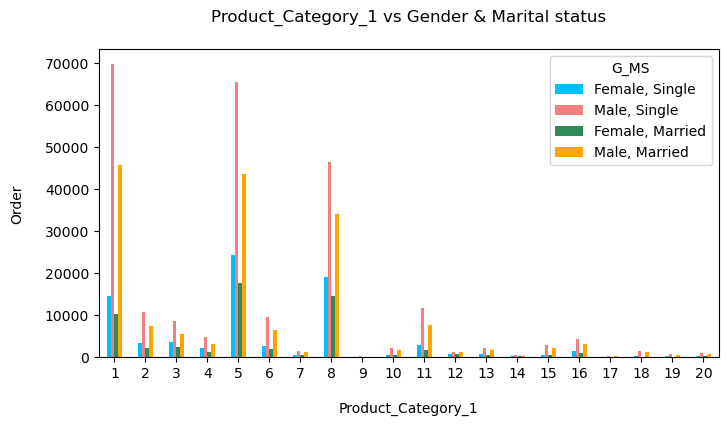

In [53]:
ax = df_product_cat1_gms.plot(kind='bar', 
                            stacked=False,
                            color=['deepskyblue', 'lightcoral', 'seagreen','orange',
                                   'orchid','gold','chocolate'], 
                            rot=0,
                            figsize=(8,4))
plt.xlabel('Product_Category_1', labelpad=15)
plt.ylabel('Order', labelpad=15)
plt.title('Product_Category_1 vs Gender & Marital status', pad=20)
plt.show;

### Column Product_Category_2 vs G_MS

In [54]:
df_product_cat2_gms = df['G_MS'].astype(g_ms_type).groupby(df['Product_Category_2'].astype(product_cat2_type)).value_counts(sort=False).unstack()
df_product_cat2_gms

G_MS,"Female, Single","Male, Single","Female, Married","Male, Married"
Product_Category_2,,,,
2,5456,24416,3743,15602
3,385,1416,232,851
4,4752,11060,2867,6998
5,3738,12165,2417,7915
6,1879,7925,1412,5250
7,75,294,62,195
8,34731,103871,26077,73047
9,881,2542,616,1654
10,378,1269,358,1038


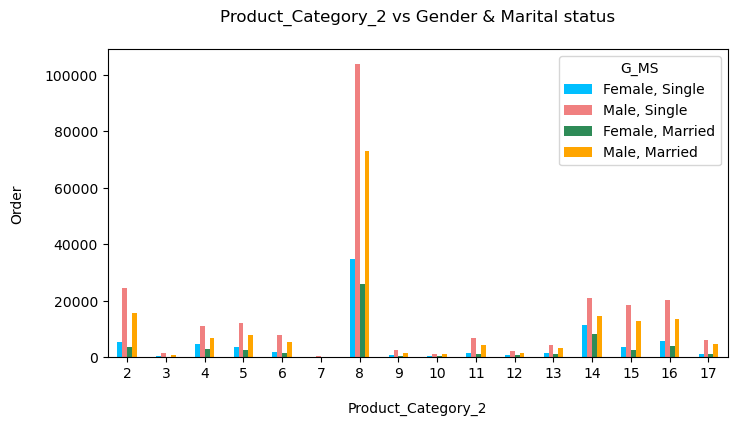

In [55]:
ax = df_product_cat2_gms.plot(kind='bar', 
                            stacked=False,
                            color=['deepskyblue', 'lightcoral', 'seagreen','orange',
                                   'orchid','gold','chocolate'], 
                            rot=0,
                            figsize=(8,4))
plt.xlabel('Product_Category_2', labelpad=15)
plt.ylabel('Order', labelpad=15)
plt.title('Product_Category_2 vs Gender & Marital status', pad=20)
plt.show;

### Column Product_Category_3 vs G_MS

In [56]:
df_product_cat3_gms = df['G_MS'].astype(g_ms_type).groupby(df['Product_Category_3'].astype(product_cat3_type)).value_counts(sort=False).unstack()
df_product_cat3_gms

G_MS,"Female, Single","Male, Single","Female, Married","Male, Married"
Product_Category_3,,,,
3,54,333,41,185
4,279,931,154,511
5,2614,7642,1683,4719
6,497,2558,331,1504
8,1702,5666,1239,3955
9,1674,5482,1002,3421
10,224,733,190,579
11,209,897,125,574
12,1652,3938,1070,2586


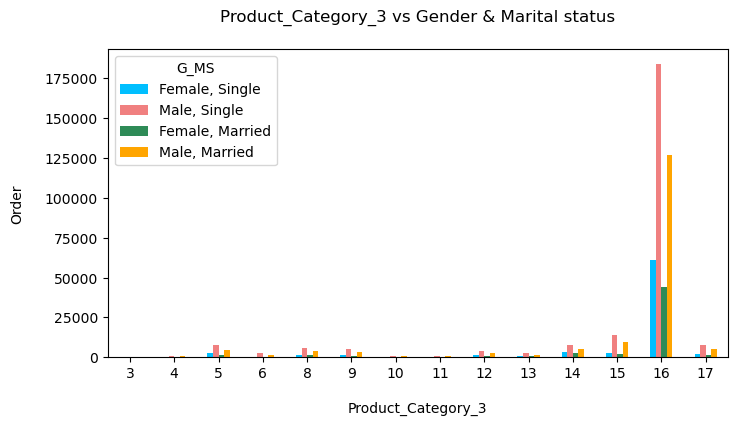

In [57]:
ax = df_product_cat3_gms.plot(kind='bar', 
                            stacked=False,
                            color=['deepskyblue', 'lightcoral', 'seagreen','orange',
                                   'orchid','gold','chocolate'], 
                            rot=0,
                            figsize=(8,4))
plt.xlabel('Product_Category_3', labelpad=15)
plt.ylabel('Order', labelpad=15)
plt.title('Product_Category_3 vs Gender & Marital status', pad=20)
plt.show;

### Combine all `single plots` into subplots

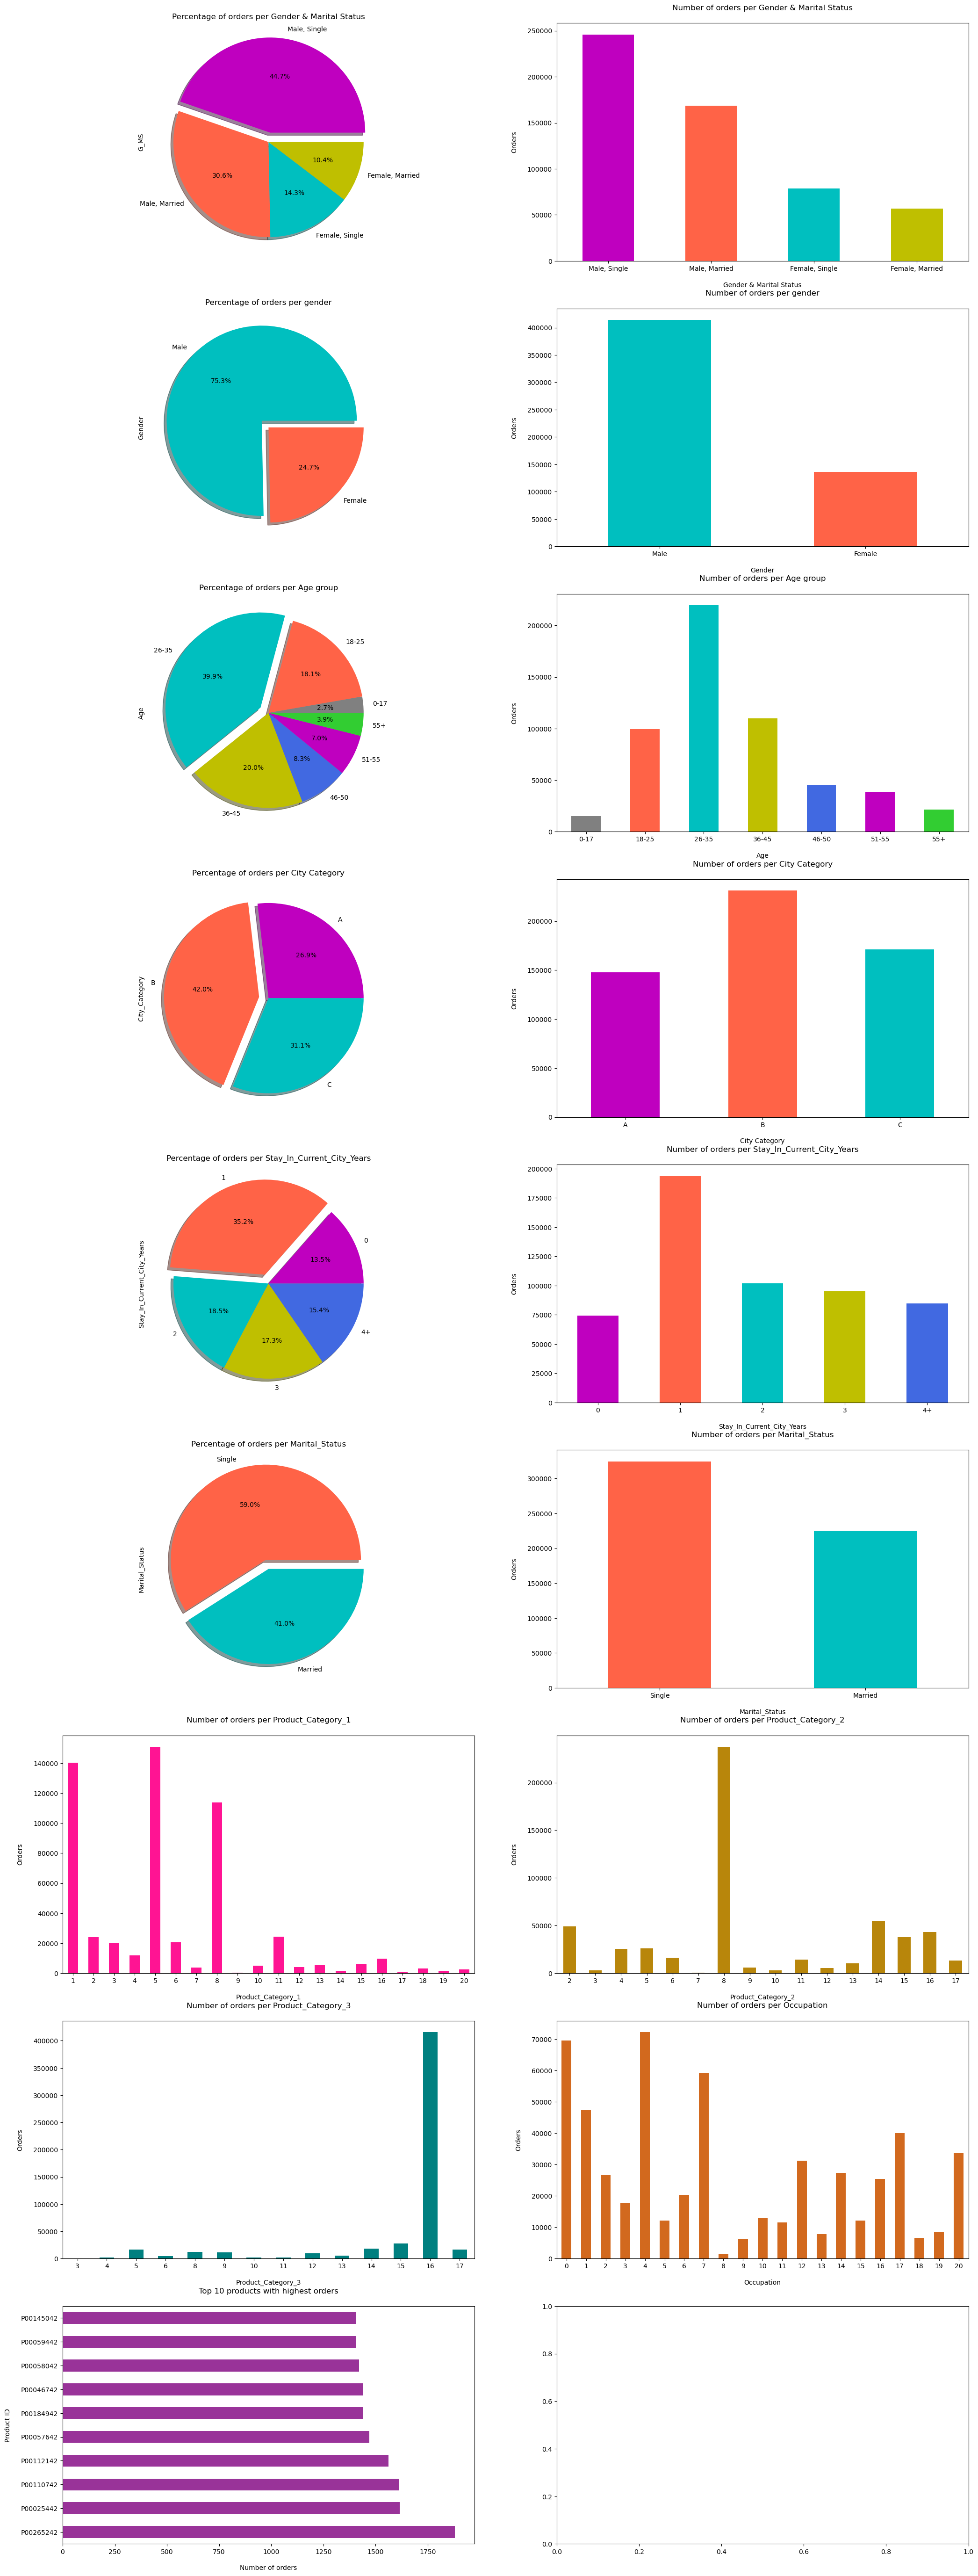

In [88]:
fig, axes = plt.subplots(nrows=9, ncols=2, figsize=(25,70))

g_ms_col.plot(ax=axes[0,0],
              kind='pie', 
              labels = g_ms_col.index,
              autopct = '%1.1f%%',
              colors = ['m','tomato','c','y'],
              explode = (0.1, 0, 0, 0), 
              shadow = True);

g_ms_col.plot(ax=axes[0,1],
            kind='bar', 
            stacked=False,
            color=['m','tomato','c','y'], rot=0);

gender_col.plot(ax=axes[1,0],
                kind='pie', 
                labels = gender_col.index,
                autopct = '%1.1f%%',
                colors = ['c', 'tomato'],
                explode = (0.1, 0), 
                shadow = True);

gender_col.plot(ax=axes[1,1],
                kind='bar', 
                stacked=False,
                color=['c', 'tomato'], 
                rot=0);
    
age_col.plot(ax=axes[2,0],
             kind='pie',
             labels = age_col.index,
             autopct = '%1.1f%%',
             colors = ['gray','tomato','c','y','royalblue','m','limegreen'],             explode = (0, 0, 0.1, 0, 0, 0, 0), 
             shadow = True);

age_col.plot(ax=axes[2,1],
             kind='bar',
             stacked=False, rot=0,
             color = ['gray','tomato','c','y','royalblue','m','limegreen']);

city_cat_col.plot(ax=axes[3,0],
                 kind='pie',
                 labels = city_cat_col.index,
                 autopct = '%1.1f%%',
                 colors = ['m','tomato','c'],
                 explode = (0, 0.1, 0), 
                 shadow = True);

city_cat_col.plot(ax=axes[3,1],
                 kind='bar',
                 stacked=False, rot=0,
                 color=['m','tomato','c']);

city_years_col.plot(ax=axes[4,0],
                    kind='pie',
                    labels = city_years_col.index,
                    autopct = '%1.1f%%',
                    colors = ['m','tomato','c','y','royalblue'],
                    explode = (0, 0.1, 0, 0, 0), 
                    shadow = True);

city_years_col.plot(ax=axes[4,1],
                    kind='bar',
                    stacked=False, rot=0,
                    color=['m','tomato','c','y','royalblue']);

marital_stt_col.plot(ax=axes[5,0],
                    kind='pie',
                    labels = marital_stt_col.index,
                    autopct = '%1.1f%%',
                    colors = ['tomato','c'],
                    explode = (0.1, 0), 
                    shadow = True);

marital_stt_col.plot(ax=axes[5,1],
                    kind='bar',
                    stacked=False, rot=0,
                    color=['tomato','c']);

product_cat1_col.plot(ax=axes[6,0],
                    kind='bar',
                    stacked=False, rot=0,
                    color='deeppink');

product_cat2_col.plot(ax=axes[6,1],
                    kind='bar',
                    stacked=False, rot=0,
                    color='darkgoldenrod');

product_cat3_col.plot(ax=axes[7,0],
                    kind='bar',
                    stacked=False, rot=0,
                    color='teal');

occ_col.plot(ax=axes[7,1],
                    kind='bar',
                    stacked=False, rot=0,
                    color='chocolate');

product_col.plot(ax=axes[8,0],
                kind='barh', 
                stacked=False,
                color='purple',
                alpha=0.8);

axes[0,0].set_title('Percentage of orders per Gender & Marital Status');

axes[0,1].set_xlabel('Gender & Marital Status', labelpad=15);
axes[0,1].set_ylabel('Orders', labelpad=15);
axes[0,1].set_title('Number of orders per Gender & Marital Status', pad=20);

axes[1,0].set_title('Percentage of orders per gender');

axes[1,1].set_xlabel('Gender', labelpad=15);
axes[1,1].set_ylabel('Orders', labelpad=15);
axes[1,1].set_title('Number of orders per gender', pad=20);
      
axes[2,0].set_title('Percentage of orders per Age group');

axes[2,1].set_xlabel('Age', labelpad=15);
axes[2,1].set_ylabel('Orders', labelpad=15);
axes[2,1].set_title('Number of orders per Age group', pad=20);

axes[3,0].set_title('Percentage of orders per City Category');

axes[3,1].set_xlabel('City Category', labelpad=15);
axes[3,1].set_ylabel('Orders', labelpad=15);
axes[3,1].set_title('Number of orders per City Category', pad=20);

axes[4,0].set_title('Percentage of orders per Stay_In_Current_City_Years');

axes[4,1].set_xlabel('Stay_In_Current_City_Years', labelpad=15);
axes[4,1].set_ylabel('Orders', labelpad=15);
axes[4,1].set_title('Number of orders per Stay_In_Current_City_Years', pad=20);

axes[5,0].set_title('Percentage of orders per Marital_Status');

axes[5,1].set_xlabel('Marital_Status', labelpad=15);
axes[5,1].set_ylabel('Orders', labelpad=15);
axes[5,1].set_title('Number of orders per Marital_Status', pad=20);

axes[6,0].set_xlabel('Product_Category_1', labelpad=15);
axes[6,0].set_ylabel('Orders', labelpad=15);
axes[6,0].set_title('Number of orders per Product_Category_1', pad=20);

axes[6,1].set_xlabel('Product_Category_2', labelpad=15);
axes[6,1].set_ylabel('Orders', labelpad=15);
axes[6,1].set_title('Number of orders per Product_Category_2', pad=20);

axes[7,0].set_xlabel('Product_Category_3', labelpad=15);
axes[7,0].set_ylabel('Orders', labelpad=15);
axes[7,0].set_title('Number of orders per Product_Category_3', pad=20);

axes[7,1].set_xlabel('Occupation', labelpad=15);
axes[7,1].set_ylabel('Orders', labelpad=15);
axes[7,1].set_title('Number of orders per Occupation', pad=20);

axes[8,0].set_xlabel('Number of orders', labelpad=15);
axes[8,0].set_ylabel('Product ID', labelpad=15);
axes[8,0].set_title('Top 10 products with highest orders', pad=20);

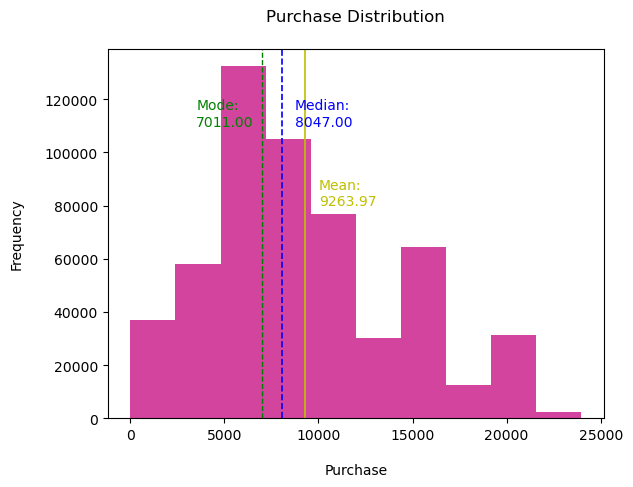

In [75]:
mean_purchase = df['Purchase'].mean()
median_purchase = df['Purchase'].median()
mode_purchase = df['Purchase'].mode()[0]

ax = df['Purchase'].plot(kind='hist', 
                          stacked=False, rot=0,
                          color='mediumvioletred',
                          alpha=0.8)

ax.axvline(mean_purchase, color='y', linestyle='-', linewidth=1.2)
ax.text(mean_purchase+750, 80000, f"Mean:\n{mean_purchase:.2f}", color="y")

ax.axvline(median_purchase, color='b', linestyle='dashed', linewidth=1.2)
ax.text(median_purchase+700, 110000, f"Median:\n{median_purchase:.2f}", color="b")

ax.axvline(mode_purchase, color='g', linestyle='--', linewidth=1)
ax.text(mode_purchase-3500, 110000, f"Mode:\n{mode_purchase:.2f}", color="g")

plt.xlabel('Purchase', labelpad=15)
plt.ylabel('Frequency', labelpad=15)
plt.title('Purchase Distribution', pad=20)
plt.show;

### Combine all grouped plots by `Gender & Marital Status` into subplots

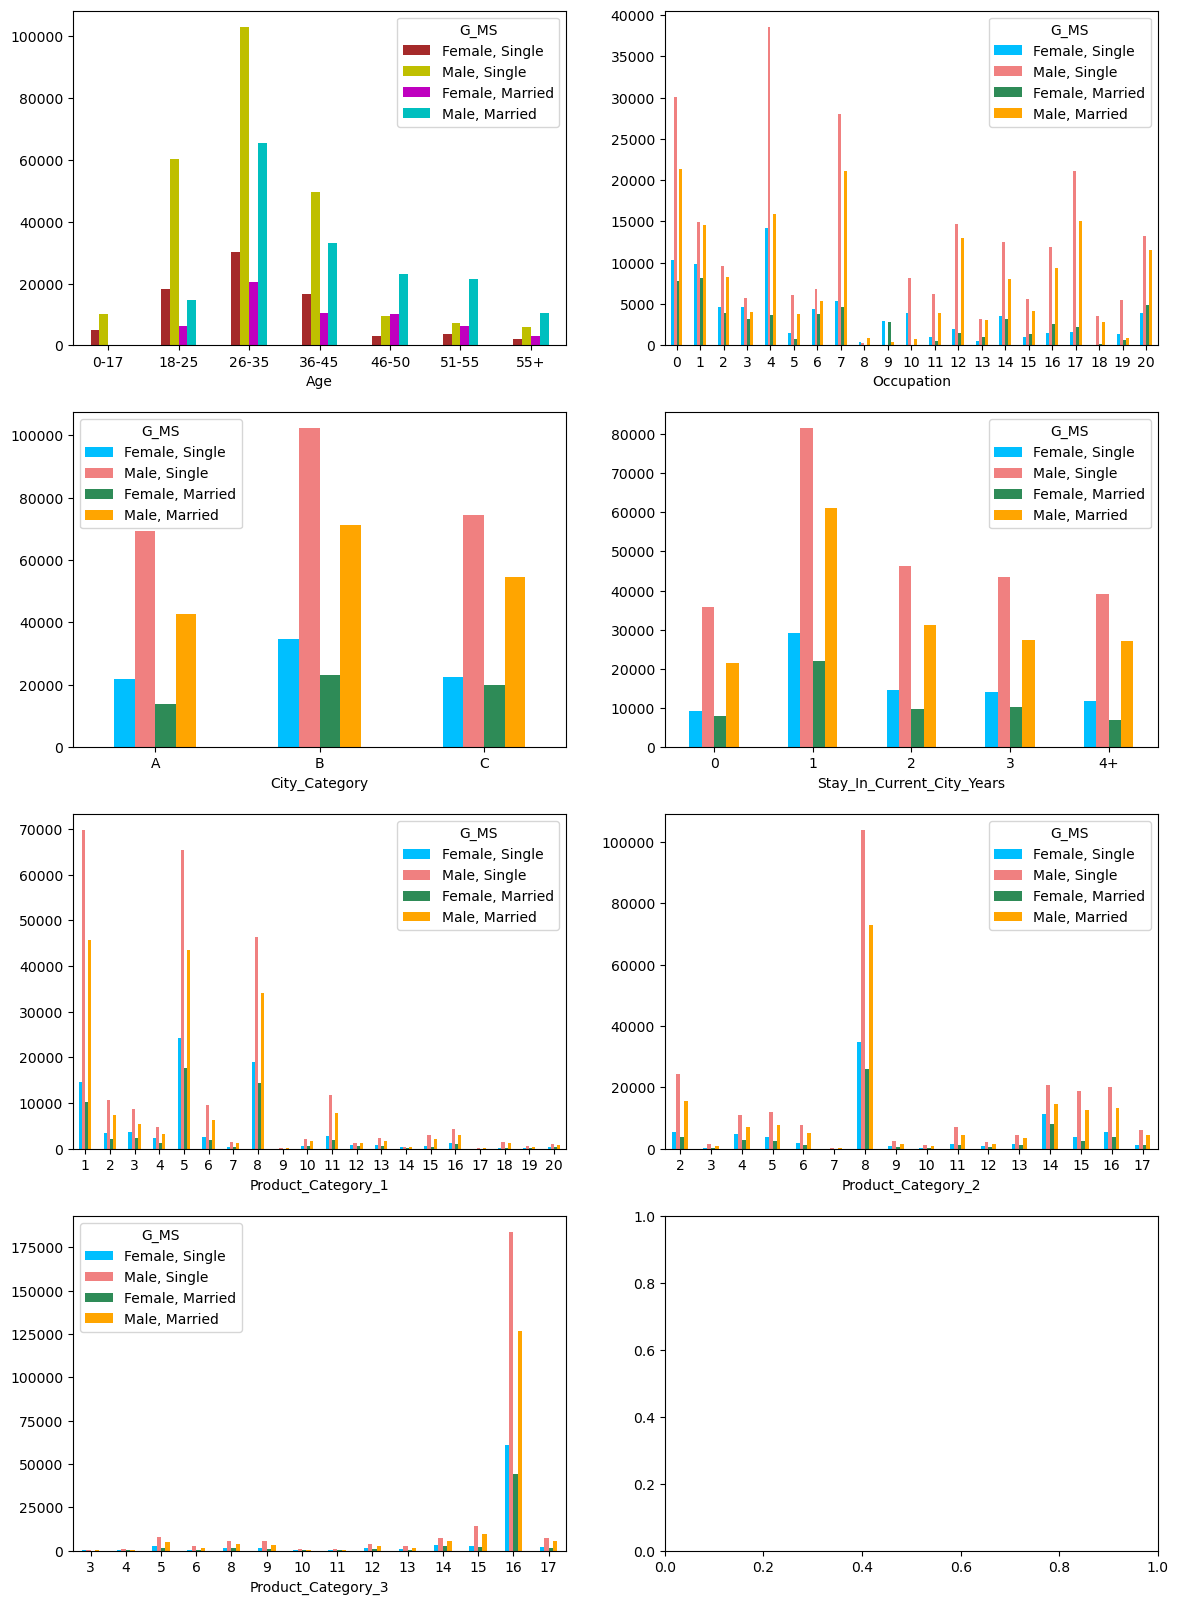

In [59]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14,20))

df_gms_age.plot(ax=axes[0,0],
                kind='bar', 
                stacked=False,
                color=['brown', 'y', 'm','c'], 
                rot=0);

df_occ_gms.plot(ax=axes[0,1],
                kind='bar', 
                stacked=False,
                color=['deepskyblue', 'lightcoral', 'seagreen','orange',
                      'orchid','gold','chocolate'], 
                rot=0);

df_citycat_gms.plot(ax=axes[1,0],
                    kind='bar', 
                    stacked=False,
                    color=['deepskyblue', 'lightcoral', 'seagreen','orange',
                          'orchid','gold','chocolate'], 
                    rot=0);
    
df_city_years_gms.plot(ax=axes[1,1],
                       kind='bar', 
                      stacked=False,
                      color=['deepskyblue', 'lightcoral', 'seagreen','orange',
                            'orchid','gold','chocolate'], 
                      rot=0);

df_product_cat1_gms.plot(ax=axes[2,0],
                        kind='bar', 
                        stacked=False,
                        color=['deepskyblue', 'lightcoral', 'seagreen','orange',
                              'orchid','gold','chocolate'], 
                        rot=0);

df_product_cat2_gms.plot(ax=axes[2,1],
                        kind='bar', 
                        stacked=False,
                        color=['deepskyblue', 'lightcoral', 'seagreen','orange',
                              'orchid','gold','chocolate'], 
                        rot=0);

df_product_cat3_gms.plot(ax=axes[3,0],
                         kind='bar', 
                         stacked=False,
                         color=['deepskyblue', 'lightcoral', 'seagreen','orange',
                               'orchid','gold','chocolate'], 
                          rot=0);